In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df=pd.read_csv("D:\\Work\\Aline\\Projet_HR_classification\\HR_Classification_Project\\Files\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head(15)

Age Attrition     BusinessTravel  DailyRate              Department  \
0    41       Yes      Travel_Rarely       1102                   Sales   
1    49        No  Travel_Frequently        279  Research & Development   
2    37       Yes      Travel_Rarely       1373  Research & Development   
3    33        No  Travel_Frequently       1392  Research & Development   
4    27        No      Travel_Rarely        591  Research & Development   
5    32        No  Travel_Frequently       1005  Research & Development   
6    59        No      Travel_Rarely       1324  Research & Development   
7    30        No      Travel_Rarely       1358  Research & Development   
8    38        No  Travel_Frequently        216  Research & Development   
9    36        No      Travel_Rarely       1299  Research & Development   
10   35        No      Travel_Rarely        809  Research & Development   
11   29        No      Travel_Rarely        153  Research & Development   
12   31        No      Travel_Rarely        670  Research & Development   
13   34        No      Travel_Rarely       1346  Research & Development   
14   28       Yes      Travel_Rarely        103  Research & Development   

    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                  1          2  Life Sciences              1               1   
1                  8          1  Life Sciences              1               2   
2                  2          2          Other              1               4   
3                  3          4  Life Sciences              1               5   
4                  2          1        Medical              1               7   
5                  2          2  Life Sciences              1               8   
6                  3          3        Medical              1              10   
7                 24          1  Life Sciences              1              11   
8                 23          3  Life Sciences              1              12   
9                 27          3        Medical              1              13   
10                16          3        Medical              1              14   
11                15          2  Life Sciences              1              15   
12                26          1  Life Sciences              1              16   
13                19          2        Medical              1              18   
14                24          3  Life Sciences              1              19   

    ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0   ...                         1            80                 0   
1   ...                         4            80                 1   
2   ...                         2            80                 0   
3   ...                         3            80                 0   
4   ...                         4            80                 1   
5   ...                         3            80                 0   
6   ...                         1            80                 3   
7   ...                         2            80                 1   
8   ...                         2            80                 0   
9   ...                         2            80                 2   
10  ...                         3            80                 1   
11  ...                         4            80                 0   
12  ...                         4            80                 1   
13  ...                         3            80                 1   
14  ...                         2            80                 0   

    TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                   8                      0               1               6   
1                  10                      3               3              10   
2                   7                      3               3               0   
3                   8                      3               3               8   
4

In [4]:
df.shape

(1470, 35)

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
#Description about the data
#Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

#EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

#JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

#JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

#PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

#RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

#WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [8]:
#My aim is to predict whether an employee will be subject to attrition and analyze the factors that may lead to attrition.
#This is a ML classification project.

In [9]:
df["EmployeeCount"].unique()

array([1], dtype=int64)

In [10]:
df["EmployeeNumber"].value_counts()

EmployeeNumber
1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: count, Length: 1470, dtype: int64

In [11]:
#Let's remove Employee Count and Employee Number columns, they are not helping for my analysis and are not key for the
#classification model

In [12]:
df.drop(['EmployeeCount','EmployeeNumber'], axis=1, inplace=True)

In [13]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  Female  ...                         1             80                 0   
1    Male  ...                         4             80                 1   
2    Male  ...                         2             80                 0   
3  Female  ...                         3             80                 0   
4    Male  ...                         4             80                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 33 columns]

In [14]:
df["StandardHours"].unique()

array([80], dtype=int64)

In [15]:
df["MonthlyIncome"].value_counts()

MonthlyIncome
2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: count, Length: 1349, dtype: int64

In [16]:
df["MonthlyRate"].value_counts()

MonthlyRate
4223     3
9150     3
9558     2
12858    2
22074    2
        ..
14561    1
2671     1
5718     1
11757    1
10228    1
Name: count, Length: 1427, dtype: int64

In [17]:
#I am keeping the Monthly Income but I am droping the Monthly Rate which is not key for my analysis. I am also dropping the
#Standard Hours column as they are the same of all employees observed : 80.

In [18]:
df.drop(["StandardHours","MonthlyRate"], axis=1, inplace=True)

In [19]:
df["DailyRate"].value_counts()

DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64

In [20]:
df["HourlyRate"].value_counts()

HourlyRate
66    29
98    28
42    28
48    28
84    28
      ..
31    15
53    14
68    14
38    13
34    12
Name: count, Length: 71, dtype: int64

In [21]:
#To simplify the DataFrame, I am only keeping the Monthly Income
df.drop(["DailyRate","HourlyRate"], axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [23]:
df["Gender"].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [24]:
df["JobRole"].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [25]:
df["Over18"].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [26]:
#The Over18 variable is not important (all employees have over 18 years old) so I am dropping it.

In [27]:
df.drop("Over18", axis=1, inplace=True)

In [28]:
df["OverTime"].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [29]:
df["PercentSalaryHike"].value_counts()

PercentSalaryHike
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: count, dtype: int64

In [30]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [31]:
df["StockOptionLevel"].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [32]:
df["BusinessTravel"].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [33]:
df["Department"].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [34]:
df["NumCompaniesWorked"].value_counts()

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

In [35]:
#The NumCompaniesWorked column show the number of companies the employee has worked for before the current one. 0 means that
#the employee has only worked so far for this current company.

In [36]:
df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   41       Yes      Travel_Rarely                   Sales                 1   
1   49        No  Travel_Frequently  Research & Development                 8   
2   37       Yes      Travel_Rarely  Research & Development                 2   
3   33        No  Travel_Frequently  Research & Development                 3   
4   27        No      Travel_Rarely  Research & Development                 2   

   Education EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  \
0          2  Life Sciences                        2  Female               3   
1          1  Life Sciences                        3    Male               2   
2          2          Other                        4    Male               2   
3          4  Life Sciences                        4  Female               3   
4          1        Medical                        1    Male               3   

   ...  PerformanceRating RelationshipSatisfaction  StockOptionLevel  \
0  ...                  3                        1                 0   
1  ...                  4                        4                 1   
2  ...                  3                        2                 0   
3  ...                  3                        3                 0   
4  ...                  3                        4                 1   

  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
0                 8                      0                1              6   
1                10                      3                3             10   
2                 7                      3                3              0   
3                 8                      3                3              8   
4                 6                      3                3              2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 28 columns]

In [37]:
#The DataFrame is clean, moving on to dataviz and statistics analysis linked to the target variable = attrition

In [38]:
#First, I am encoding my target variable, in order to have yes =1 and no=0 for attrition.
df.replace(to_replace=["Yes", "No"], value=[1,0], inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [40]:
df.to_csv("D:\\Work\\Aline\\Projet_HR_classification\\HR_Classification_Project\\Files\\df_clean.csv", index=False)

In [41]:
df_clean=pd.read_csv("D:\\Work\\Aline\\Projet_HR_classification\\HR_Classification_Project\\Files\\df_clean.csv")
df_clean.head()

Age  Attrition     BusinessTravel              Department  \
0   41          1      Travel_Rarely                   Sales   
1   49          0  Travel_Frequently  Research & Development   
2   37          1      Travel_Rarely  Research & Development   
3   33          0  Travel_Frequently  Research & Development   
4   27          0      Travel_Rarely  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  JobInvolvement  ...  PerformanceRating RelationshipSatisfaction  \
0  Female               3  ...                  3                        1   
1    Male               2  ...                  4                        4   
2    Male               2  ...                  3                        2   
3  Female               3  ...                  3                        3   
4    Male               3  ...                  3                        4   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                 0                 8                      0                1   
1                 1                10                      3                3   
2                 0                 7                      3                3   
3                 0                 8                      3                3   
4                 1                 6                      3                3   

   YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                   4                        0   
1              10                   7                        1   
2               0                   0                        0   
3               8                   7                        3   
4               2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 28 columns]

In [42]:
df_clean["MonthlyIncome"].unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

In [43]:
df_clean["JobRole"].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [44]:
df_satisfaction=df_clean.groupby("Department").agg({"MonthlyIncome":"mean"})

In [45]:
df_satisfaction.sort_values(by="MonthlyIncome", ascending=False)

MonthlyIncome
Department                           
Sales                     6959.172646
Human Resources           6654.507937
Research & Development    6281.252862

In [46]:
#The Sales department has the highest average monthly income, followed by HR and R&D. Let's see in which of the 3 departments
#the attrition is is higher

In [47]:
sales_attrition=df_clean.loc[(df_clean['Department']=="Sales") & (df_clean['Attrition']==1)]

In [48]:
len(sales_attrition)

92

In [49]:
hr_attrition=df_clean.loc[(df_clean['Department']=="Human Resources") & (df_clean['Attrition']==1)]

In [50]:
len(hr_attrition)

12

In [51]:
rd_attrition=df_clean.loc[(df_clean['Department']=="Research & Development") & (df_clean['Attrition']==1)]

In [52]:
len(rd_attrition)

133

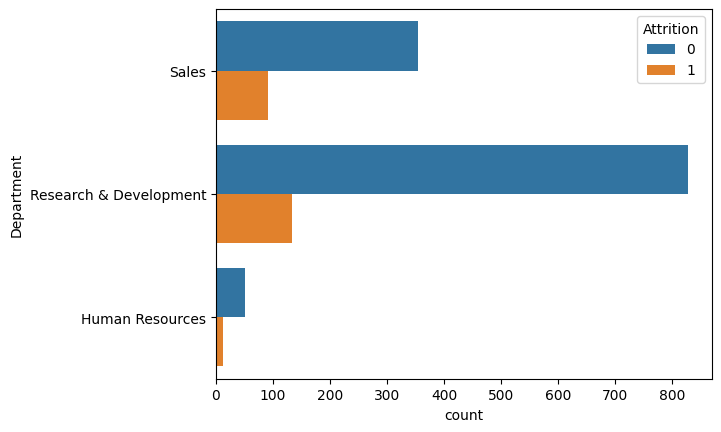

In [53]:
sns.countplot(y="Department", hue="Attrition", data=df_clean);

In [54]:
fig=px.area(df_clean, x="MonthlyIncome", y="YearsAtCompany", color="Gender",title='Monthly Income per years at company and gender')
fig.update_traces(textposition="bottom center")
fig.show()

In [55]:
#It showcases that the highest incomes are for men and not particularly linked to the years within the company. 

In [56]:
fig=px.area(df_clean, y="MonthlyIncome", x="JobSatisfaction", color="JobRole")
fig.show()

In [57]:
job_satis=df_clean.groupby(['JobRole']).agg({"MonthlyIncome":"mean",
                                            "JobSatisfaction":"count"})
job_satis.sort_values(by="JobSatisfaction", ascending=False)

MonthlyIncome  JobSatisfaction
JobRole                                                  
Sales Executive              6924.279141              326
Research Scientist           3239.972603              292
Laboratory Technician        3237.169884              259
Manufacturing Director       7295.137931              145
Healthcare Representative    7528.763359              131
Manager                     17181.676471              102
Sales Representative         2626.000000               83
Research Director           16033.550000               80
Human Resources              4235.750000               52

In [58]:
job_attrition=df_clean.groupby(['JobRole']).agg({"Attrition":"count"})
job_gender=df_clean.groupby(['JobRole']).agg({"Gender":"count"})

In [59]:
fig5 = go.Figure()
fig5.add_traces([go.Bar(name='Monthly Income',
                       x=job_satis.index,
                       y=job_satis['MonthlyIncome'], marker_color="#87a96b")])

fig5.update_layout(title="Monthly income per job role")

fig5.show();

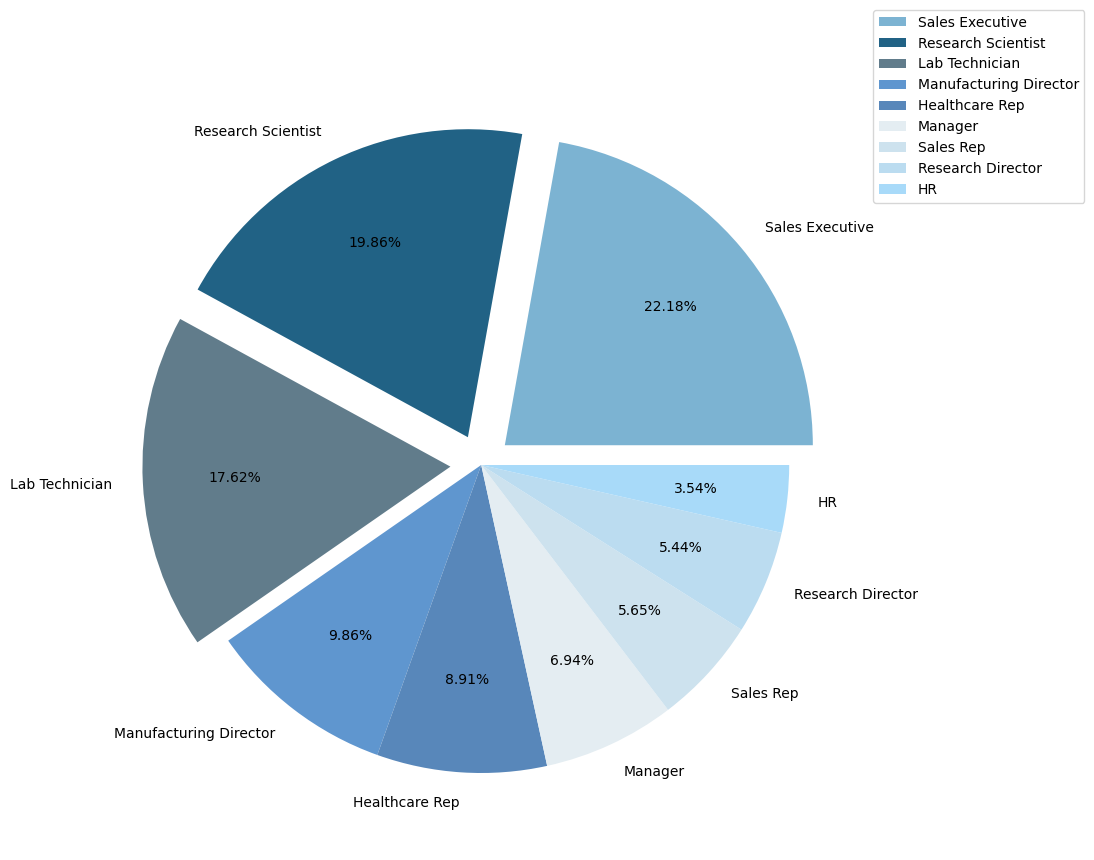

In [60]:
plt.figure(figsize=(10,10))
plt.pie(x=job_satis['JobSatisfaction'].sort_values(ascending=False), labels=["Sales Executive", "Research Scientist", "Lab Technician", "Manufacturing Director", "Healthcare Rep", "Manager", "Sales Rep", "Research Director", "HR"],
       colors=["#7cb3d2","#216285","#617c8b","#5f96cf","#5887ba","#e4edf2","#cde2ee","#bbdcf0","#a8daf9"], explode=[0.1,0.1,0.1,0,0,0,0,0,0],
        autopct=lambda x:round(x,2).astype(str)+"%", pctdistance=0.7, labeldistance=1.1)
plt.title=('Job Role with the highest job satisfaction score')
plt.legend(bbox_to_anchor=(1,1.1), loc="upper left")
plt.show()

In [61]:
df_clean["Attrition"].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

D:\Work\Aline\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



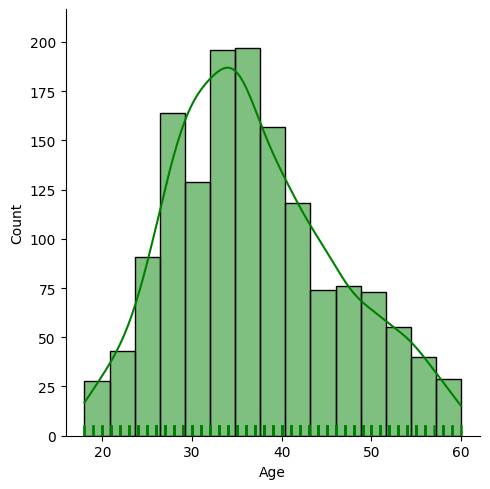

In [62]:
sns.displot(df_clean["Age"], kde=True,rug=True,bins=15,color="green")
plt.title=("Repartition of the variable : Age");

D:\Work\Aline\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



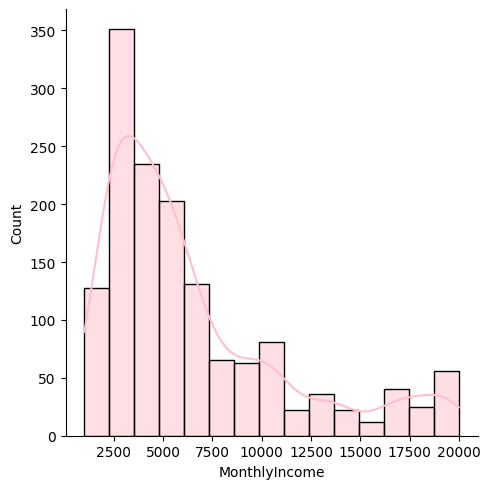

In [63]:
sns.displot(df_clean["MonthlyIncome"], kde=True,bins=15, color="pink")
plt.title=("Repartition of the variable : Monthly Income");

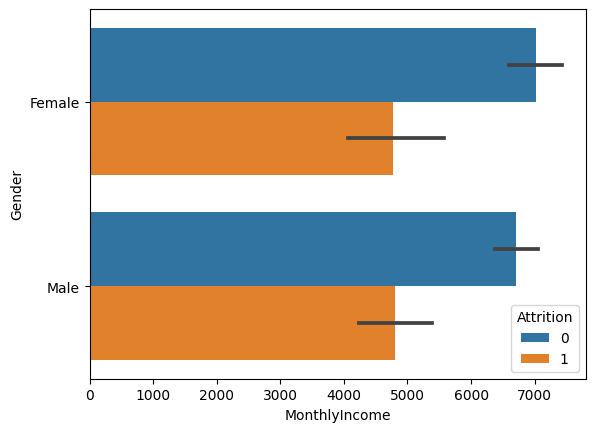

In [64]:
sns.barplot(x="MonthlyIncome", y="Gender", data=df_clean, hue="Attrition");

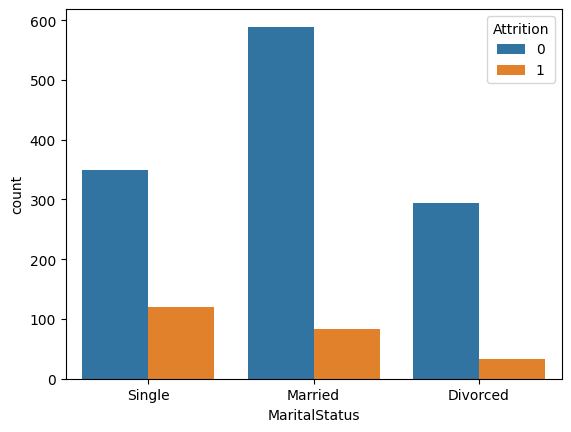

In [65]:
sns.countplot(x="MaritalStatus", hue="Attrition", data=df_clean);

In [66]:
#We can see here that employee at risk of attrition have a less important monthly income that the employees remaining. And 
#that the genders are equal.

<Figure size 1500x1500 with 0 Axes>

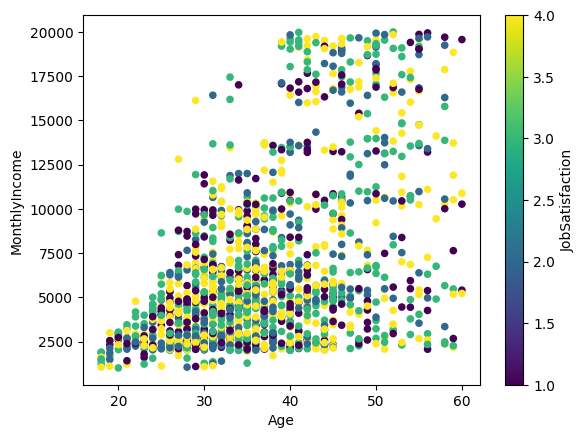

In [67]:
plt.figure(figsize=(15,15))
df_clean.plot.scatter(x="Age", y="MonthlyIncome", c="JobSatisfaction", s=20, cmap="viridis")
plt.title=("Job Satisfaction rating depending on Age and Monthly Income");

In [68]:
#We can see that this is very well distributed, job satisfaction rating is quite homogenous, there is no clear separation
# between older and younger employee for instance.

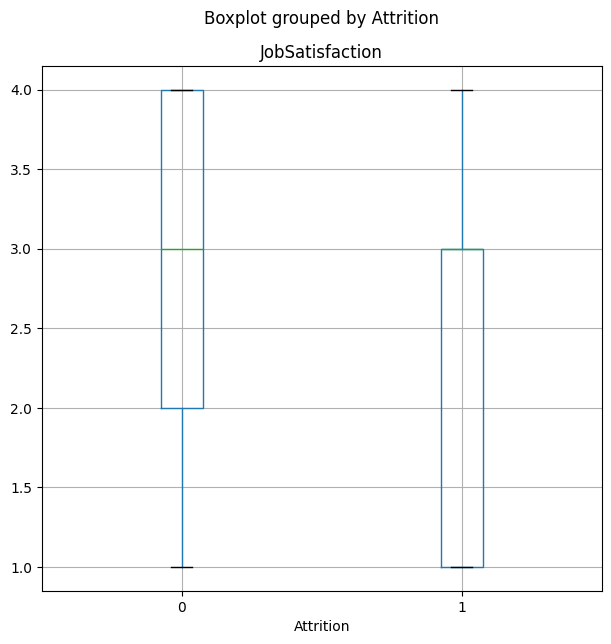

In [69]:
df_clean.boxplot(column="JobSatisfaction", by="Attrition", figsize=(7,7));

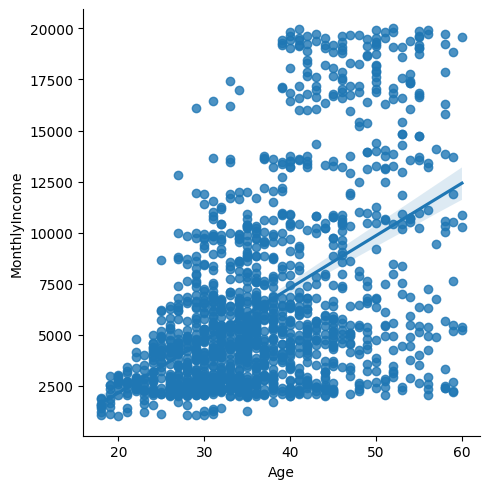

In [70]:
sns.lmplot(y="MonthlyIncome", x="Age",data=df_clean);

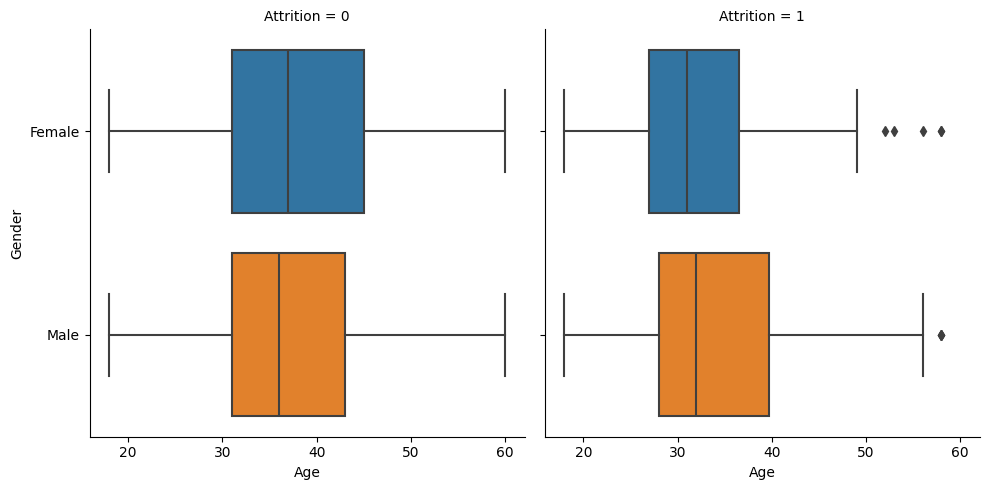

In [71]:
sns.catplot(x="Age",y="Gender",kind="box",col="Attrition", data=df_clean);

In [72]:
year_attrition=df_clean.groupby(['Attrition']).agg({"TotalWorkingYears":"mean",
                                                   'YearsSinceLastPromotion':"mean",
                                                   "YearsAtCompany":"mean",
                                                   "YearsWithCurrManager":"mean",
                                                   "YearsInCurrentRole":"mean",
                                                   "Age":"mean"})

In [73]:
year_attrition

TotalWorkingYears  YearsSinceLastPromotion  YearsAtCompany  \
Attrition                                                               
0                  11.862936                 2.234388        7.369019   
1                   8.244726                 1.945148        5.130802   

           YearsWithCurrManager  YearsInCurrentRole        Age  
Attrition                                                       
0                      4.367397            4.484185  37.561233  
1                      2.852321            2.902954  33.607595

In [74]:
#Here we can see that the employees who are more at risk to leave the company are the younger ones, they have been in the role
#since less time and within the company less years than the rest (by the way, an attrition after 5 years in the company
#is a very good score compared to other tech companies today). We can note that it is not promotion that leads to attrition
#as the mean of years since last promotion are very close but the gap is important when it comes to manager. Employees at risk
#of attrition have spent half less time with their current manager than the employees who are staying. 

In [75]:
df_clean_num=df_clean.select_dtypes(include=['int','float'])

In [76]:
df_clean_num.head()

Age  Attrition  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41          1                 1          2                        2   
1   49          0                 8          1                        3   
2   37          1                 2          2                        4   
3   33          0                 3          4                        4   
4   27          0                 2          1                        1   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0               3         2                4           5993   
1               2         2                2           5130   
2               2         1                3           2090   
3               3         1                3           2909   
4               3         1                2           3468   

   NumCompaniesWorked  ...  PerformanceRating  RelationshipSatisfaction  \
0                   8  ...                  3                         1   
1                   1  ...                  4                         4   
2                   6  ...                  3                         2   
3                   1  ...                  3                         3   
4                   9  ...                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2  

[5 rows x 22 columns]

In [77]:
df_clean_num.to_csv("D:\\Work\\Aline\\Projet_HR_classification\\HR_Classification_Project\\Files\\df_clean_num.csv", index=False)

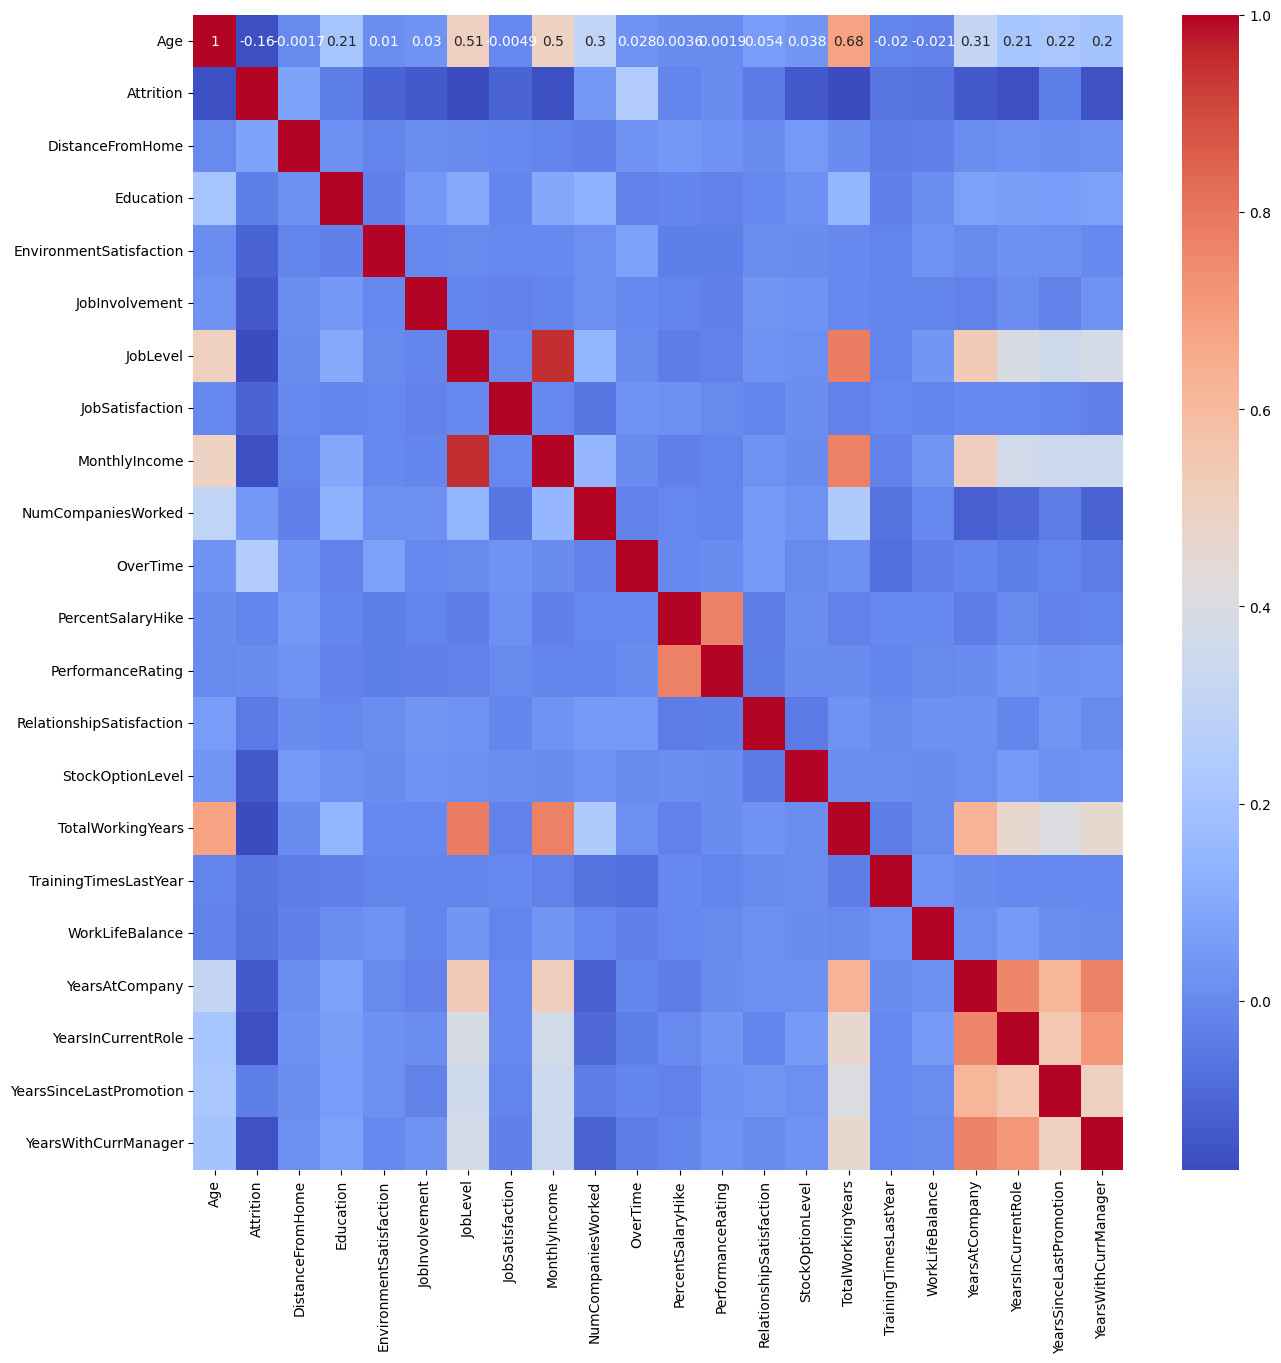

In [78]:
cor = df_clean_num.corr() 
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(cor, annot = True, ax = ax, cmap = "coolwarm");

In [79]:
#The correlation heatmap showcases that attrition is quite difficult to analyze as all the other variables seem to not be
#correlated with it. It will demand a bit more of search and statistical tests to better understand what influences attrition.

In [80]:
#I am going to reduce the size of the dataset to pre-process for ML.

In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [82]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop = None, handle_unknown = 'ignore', sparse=False)
cat=['BusinessTravel','Department','EducationField','JobRole',"MaritalStatus"]
df_clean_encoded=ohe.fit_transform(df_clean[cat])

D:\Work\Aline\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [83]:
df_clean_str_encoded=pd.DataFrame(df_clean_encoded, columns=ohe.get_feature_names_out(), index=df_clean.index)
df_clean_str_encoded

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                           0.0                               0.0   
1                           0.0                               1.0   
2                           0.0                               0.0   
3                           0.0                               1.0   
4                           0.0                               0.0   
...                         ...                               ...   
1465                        0.0                               1.0   
1466                        0.0                               0.0   
1467                        0.0                               0.0   
1468                        0.0                               1.0   
1469                        0.0                               0.0   

      BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                              1.0                         0.0   
1                              0.0                         0.0   
2                              1.0                         0.0   
3                              0.0                         0.0   
4                              1.0                         0.0   
...                            ...                         ...   
1465                           0.0                         0.0   
1466                           1.0                         0.0   
1467                           1.0                         0.0   
1468                           0.0                         0.0   
1469                           1.0                         0.0   

      Department_Research & Development  Department_Sales  \
0                                   0.0               1.0   
1                                   1.0               0.0   
2                                   1.0               0.0   
3                                   1.0               0.0   
4                                   1.0               0.0   
...                                 ...               ...   
1465                                1.0               0.0   
1466                                1.0               0.0   
1467                                1.0               0.0   
1468                                0.0               1.0   
1469                                1.0               0.0   

      EducationField_Human Resources  EducationField_Life Sciences  \
0                                0.0                           1.0   
1                                0.0                           1.0   
2                                0.0                           0.0   
3                                0.0                           1.0   
4                                0.0                           0.0   
...                              ...                           ...   
1465                             0.0                           0.0   
1466                             0.0                           0.0   
1467                             0.0                           1.0   
1468                             0.0                           0.0   
1469                             0.0                           0.0   

      EducationField_Marketing  EducationField_Medical  ...  \
0                          0.0                     0.0  ...   
1                          0.0                     0.0  ...   
2                          0.0                     0.0  ...   
3                          0.0                     0.0  ...   
4                          0.0                     1.0  ...   
...                        ...                     ...  ...   
1465                       0.0                     1.0  ...   
1466                       0.0                     1.0  ...   
1467                       0.0                     0.0  ...   
1468                       0.0                     1.0  ...   
1469                       0.0                     1.0  ...   

      JobRole_Laboratory Technician  JobRole_Manager 

In [84]:
df_X_clean=df_clean.merge(df_clean_str_encoded, how="inner", right_index=True, left_index=True)

In [85]:
df_X_clean.drop(['BusinessTravel','Department','EducationField','JobRole',"MaritalStatus"], axis=1, inplace=True)

In [86]:
df_X_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   int64  
 3   Education                          1470 non-null   int64  
 4   EnvironmentSatisfaction            1470 non-null   int64  
 5   Gender                             1470 non-null   object 
 6   JobInvolvement                     1470 non-null   int64  
 7   JobLevel                           1470 non-null   int64  
 8   JobSatisfaction                    1470 non-null   int64  
 9   MonthlyIncome                      1470 non-null   int64  
 10  NumCompaniesWorked                 1470 non-null   int64  
 11  OverTime                           1470 non-null   int64

In [87]:
# I am encoding the Gender column, in order to have Female=1 and Male=0.
df_X_clean.replace(to_replace=["Female", "Male"], value=[1,0], inplace=True)

In [88]:
df_X_clean

Age  Attrition  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41          1                 1          2                        2   
1      49          0                 8          1                        3   
2      37          1                 2          2                        4   
3      33          0                 3          4                        4   
4      27          0                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36          0                23          2                        3   
1466   39          0                 6          1                        4   
1467   27          0                 4          3                        2   
1468   49          0                 2          3                        4   
1469   34          0                 8          3                        2   

      Gender  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          1               3         2                4           5993  ...   
1          0               2         2                2           5130  ...   
2          0               2         1                3           2090  ...   
3          1               3         1                3           2909  ...   
4          0               3         1                2           3468  ...   
...      ...             ...       ...              ...            ...  ...   
1465       0               4         2                4           2571  ...   
1466       0               2         3                1           9991  ...   
1467       0               4         2                2           6142  ...   
1468       0               2         2                2           5390  ...   
1469       0               4         2                3           4404  ...   

      JobRole_Laboratory Technician  JobRole_Manager  \
0                               0.0              0.0   
1                               0.0              0.0   
2                               1.0              0.0   
3                               0.0              0.0   
4                               1.0              0.0   
...                             ...              ...   
1465                            1.0              0.0   
1466                            0.0              0.0   
1467                            0.0              0.0   
1468                            0.0              0.0   
1469                            1.0              0.0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                                0.0                        0.0   
1                                0.0                        0.0   
2                                0.0                        0.0   
3                                0.0                        0.0   
4                                0.0                        0.0   
...                              ...                        ...   
1465                             0.0                        0.0   
1466                             0.0                        0.0   
1467                             1.0                        0.0   
1468                             0.0                        0.0   
1469                             0.0                        0.0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                            0.0                      1.0   
1                            1.0                      0.0   
2                            0.0                      0.0   
3                            1.0                      0.0   
4                            0.0                      0.0   
...                          ...                      ...   
1465                         0.0                      0.0   
1466                         0.0                      0.0   
1467                         0.0                      0.0   
1468                         0.0

In [89]:
#Now I can process the Standard Scaler on the whole DataFrame so they all have the same scale.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Z=scaler.fit_transform(df_X_clean)

In [90]:
from sklearn.decomposition import PCA
pca=PCA()
coord=pca.fit_transform(Z)

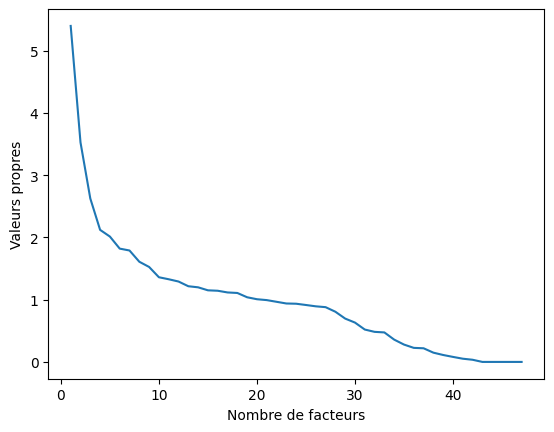

In [91]:
pca.explained_variance_
plt.plot(np.arange(1,48), pca.explained_variance_)
plt.xlabel('Nombre de facteurs')
plt.ylabel("Valeurs propres");

In [92]:
#We can see that we have around 10 - 15 factors that are important

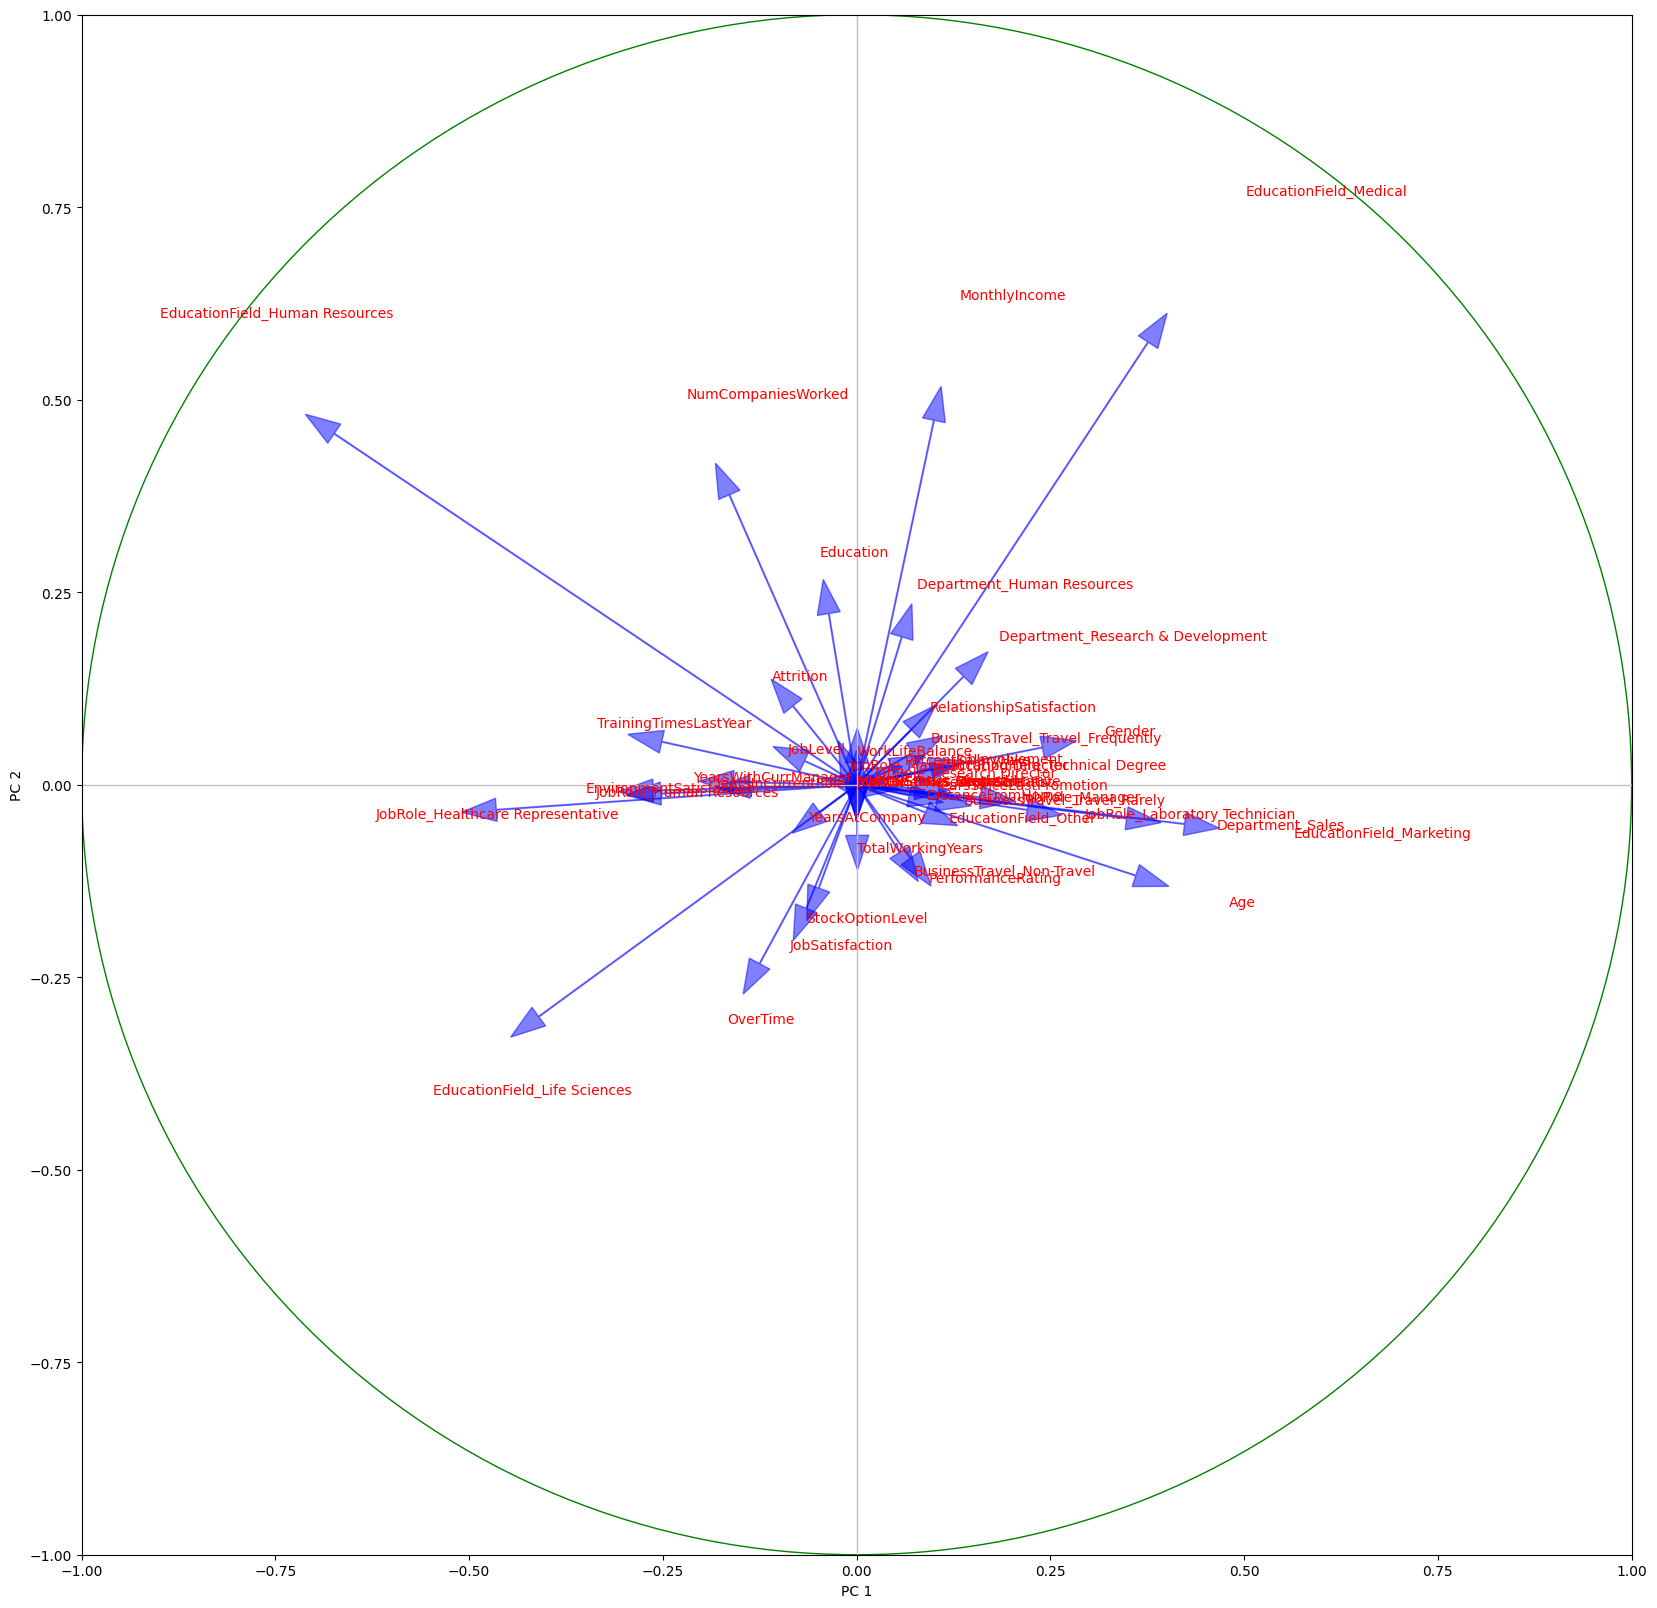

In [93]:
size=len(df_X_clean.columns)
racine_valeurs_propres=np.sqrt(pca.explained_variance_)
corvar=np.zeros((size,size))
for k in range(size):
    corvar[:,k]=pca.components_[:,k]*racine_valeurs_propres[k]
    
fig,axes=plt.subplots(figsize=(20,20))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(size):
    plt.annotate(df_X_clean.columns[j],(corvar[j,0]*0.8,corvar[j,1]*0.8), color='red')
    plt.arrow(0,0,corvar[j,0]*0.6, corvar[j,1]*0.6, alpha=0.5, head_width=0.03, color="b")
    
plt.plot([-1,1],[0,0], color="silver", linestyle="-", linewidth=1)
plt.plot([0,0],[-1,1], color="silver", linestyle='-', linewidth=1)

cercle=plt.Circle((0,0),1, color="green",fill=False)
axes.add_artist(cercle)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

In [94]:
target=df_X_clean["Attrition"]

In [95]:
df_X_clean.drop("Attrition", axis=1, inplace=True)

In [96]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, random_state=0)
coord_TSNE=tsne.fit_transform(df_X_clean)

In [98]:
tsne_df_clean=pd.DataFrame({"Axe 1":coord_TSNE[:,0],
                           "Axe 2": coord_TSNE[:,1],
                           "Target":target})

In [99]:
tsne_df_clean

Axe 1      Axe 2  Target
0     12.937105   1.805491       1
1     -3.980654  15.793550       0
2    -57.549316 -15.342199       1
3    -28.918142  14.109829       0
4    -26.471052  -6.876057       0
...         ...        ...     ...
1465 -47.981888  19.629257       0
1466  34.608288   7.847236       0
1467  13.355745  -1.956542       0
1468   5.657918  18.437372       0
1469  -5.812860 -13.137540       0

[1470 rows x 3 columns]

In [100]:
tsne_new=TSNE(n_components=2, random_state=0)
coord_TSNE_ACP=tsne_new.fit_transform(coord)

In [101]:
tsne_acp_df_clean=pd.DataFrame({"Axe 1":coord_TSNE_ACP[:,0],
                              "Axe 2":coord_TSNE_ACP[:,1],
                                "Target":target})

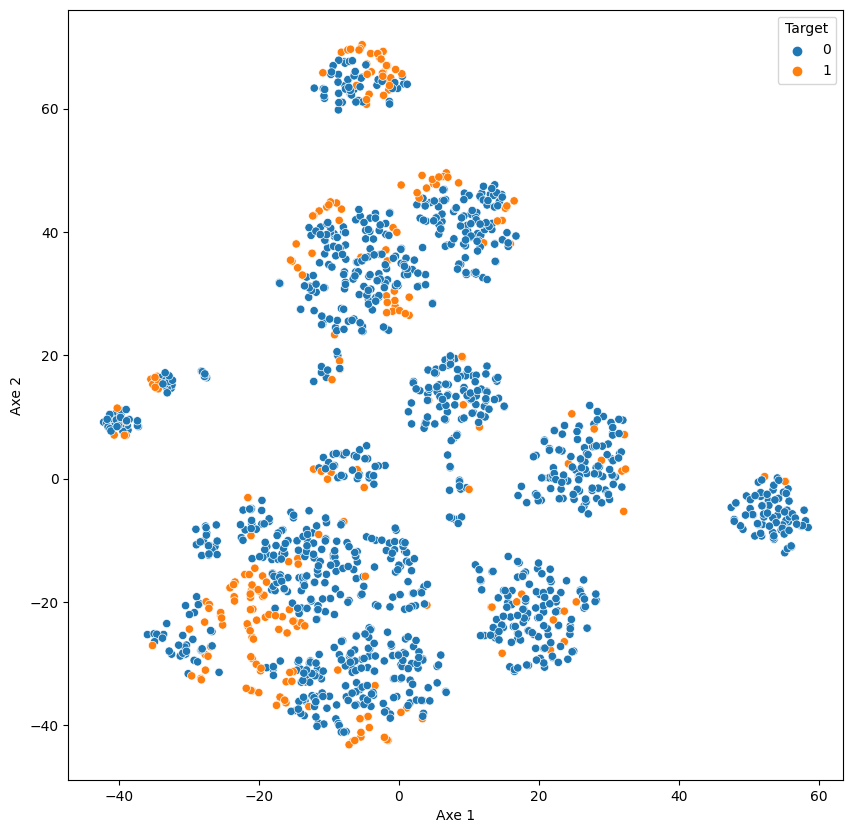

In [102]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Axe 1", y="Axe 2", hue="Target", data=tsne_acp_df_clean);

In [ ]:
from sklearn